In [194]:
import pandas as pd
data = pd.read_excel('data\\2022_sber.xlxs')
data2 = pd.read_excel('data\\Document2.xlsx')

In [195]:
data.drop(columns=['Сумма в валюте операции', 'Валюта операции'], inplace=True)
data2.drop(columns=['Сумма в валюте операции', 'Валюта операции'], inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Дата операции         748 non-null    datetime64[ns]
 1   Дата обработки        748 non-null    datetime64[ns]
 2   Код авторизации       748 non-null    object        
 3   Описание операции     748 non-null    object        
 4   Категория             748 non-null    object        
 5   Сумма в валюте счёта  748 non-null    float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 35.2+ KB


In [196]:
data = pd.concat([data, data2], ignore_index=True)
data.sort_values(by='Дата операции')
data

,Дата операции,Дата обработки,Код авторизации,Описание операции,Категория,Сумма в валюте счёта
0,2022-12-31 14:50:00,2022-12-31,280203,KRASNOE BELOE,Супермаркеты,-1807.77
1,2022-12-31 14:46:00,2022-12-31,245331,MAGNIT MK NACHINENIE,Супермаркеты,-521.99
2,2022-12-31 14:24:00,2022-12-31,249189,MAGNIT MM KABATCHIK,Супермаркеты,-1539.35
3,2022-12-31 14:13:00,2022-12-31,223154,APTECHNOE UCHREZHD-IE,Здоровье и красота,-986.50
4,2022-12-31 09:22:00,2022-12-31,290868,"WILDBERRIES SBERPAY,",Прочие расходы,-344.00
...,...,...,...,...,...,...
1991,2022-01-02 21:49:00,2022-01-03,283256,SBOL перевод 4276****9970 В. ВИТАЛИЙ ВЛАДИМИРОВИЧ,Прочие операции,5000.00
1992,2022-01-02 13:36:00,2022-01-03,233080,SBOL перевод 4279****2959 К. ДЕНИС ЮРЬЕВИЧ,Перевод с карты,-3000.00
1993,2022-01-02 13:35:00,2022-01-03,295973,SBERBANK ONL@IN PLATEZH,Прочие операции,-2675.49
1994,2022-01-01 06:07:00,2022-01-01,242475,BRANCH KARTA-KREDIT,Прочие операции,-11069.60


In [197]:
# Почистим переводы между счетами
data = data[data['Описание операции']!='SBOL перевод 4279****2959 К. ДЕНИС ЮРЬЕВИЧ']
data = data[data['Описание операции']!='SBOL перевод 5469****0428 К. ДЕНИС ЮРЬЕВИЧ']
data['Описание операции'].value_counts().head(50)

MAGNIT MM KABATCHIK                                     142
SAMOKAT                                                 100
Тинькофф Банк                                            87
YANDEX.TAXI                                              59
SBERBANK ONL@IN PLATEZH                                  55
MONETKA                                                  53
SBOL перевод 2202****8410 К. ИРИНА ВЛАДИМИРОВНА          41
Tinkoff Card2Card                                        40
CHACHACHAY.ME                                            40
YM OZON                                                  37
SBOL перевод 5469****3541 А. ЗОХИРБЕК АТАМУРЗАЕВИЧ       32
BRANCH KARTA-KREDIT                                      30
Tinkoff Bank                                             29
APTECHNOE UCHREZHD-IE                                    24
SOVETSKIJ                                                23
Погашение процентов за покупки вне льготного периода     19
PYATEROCHKA 21288                       

In [198]:
data['period'] = pd.to_datetime(data['Дата обработки']).dt.to_period('M')
raskhod = data[data['Сумма в валюте счёта'] < 0]
raskhod.to_csv('data\\raskhod2022.csv')
raskhod['Сумма в валюте счёта'] = raskhod['Сумма в валюте счёта'] * -1

C:\Users\Денис\AppData\Local\Temp\ipykernel_8764\3256619342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raskhod['Сумма в валюте счёта'] = raskhod['Сумма в валюте счёта'] * -1


In [199]:
round(raskhod['Сумма в валюте счёта'].sum())
# Расход за 2022 год

2894158

<AxesSubplot: ylabel='Категория'>

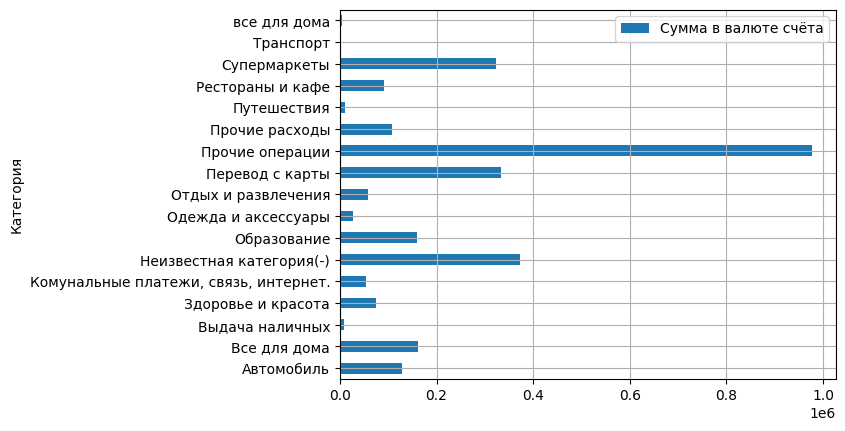

In [200]:
plot_data = raskhod[['Сумма в валюте счёта', 'Категория']]#[raskhod['Описание операции']=='SBOL перевод 5469****3541 А. ЗОХИРБЕК АТАМУРЗАЕВИЧ']
plot_data.groupby('Категория').sum().plot.barh(grid=True)

In [201]:
raskhod['Категория'].value_counts()

Супермаркеты                             490
Прочие операции                          186
Отдых и развлечения                      134
Рестораны и кафе                         102
Неизвестная категория(-)                  92
Здоровье и красота                        84
Автомобиль                                55
Перевод с карты                           50
Прочие расходы                            47
Все для дома                              37
Комунальные платежи, связь, интернет.     19
Одежда и аксессуары                        6
Транспорт                                  5
Путешествия                                4
все для дома                               2
Образование                                2
Выдача наличных                            2
Name: Категория, dtype: int64

In [202]:
raskhod[raskhod['Категория']=='Прочие операции'].groupby('Описание операции').sum().sort_values(by='Сумма в валюте счёта', ascending=False)
# BRANCH KARTA-KREDIT - списание за кредит
# SBERBANK ONL@IN PLATEZH - перевод за кредит в другой банк, садик, телефон, все что оплачено через приложение

C:\Users\Денис\AppData\Local\Temp\ipykernel_8764\1481967002.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raskhod[raskhod['Категория']=='Прочие операции'].groupby('Описание операции').sum().sort_values(by='Сумма в валюте счёта', ascending=False)


,Сумма в валюте счёта
Описание операции,
BRANCH KARTA-KREDIT,414142.18
Tinkoff Bank,192500.00
SBERBANK ONL@IN PLATEZH,170866.02
Погашение процентов за покупки вне льготного периода,72219.50
KARTA-SCHET,44797.00
SBERBANK EKP INSURANCE PAYMENT,26969.64
SBERBANK_ONL@IN_PLATEZ,25172.92
SBERBANK_ONL@IN_PLATEZH,12363.05
SBOL перевод 5228****7287,7501.00


In [203]:
raskhod[raskhod['Категория']=='Неизвестная категория(-)'].groupby('Описание операции').sum().sort_values(by='Сумма в валюте счёта', ascending=False)

C:\Users\Денис\AppData\Local\Temp\ipykernel_8764\3190381082.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raskhod[raskhod['Категория']=='Неизвестная категория(-)'].groupby('Описание операции').sum().sort_values(by='Сумма в валюте счёта', ascending=False)


,Сумма в валюте счёта
Описание операции,
Tinkoff Card2Card,223240.48
YM OZON 2,49944.82
Tinkoff Bank Card2Card,46888.00
YM OZON,40810.00
OZON3.,3873.00
YM YANDEX.PLUS,3190.00
Y.M*OZON,1115.00
donatepay.ru,1000.00
YM NETFLIX,599.00


In [204]:
raskhod[raskhod['Категория']=='Супермаркеты'].groupby('Описание операции').sum().sort_values(by='Сумма в валюте счёта')

C:\Users\Денис\AppData\Local\Temp\ipykernel_8764\1632024005.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raskhod[raskhod['Категория']=='Супермаркеты'].groupby('Описание операции').sum().sort_values(by='Сумма в валюте счёта')


,Сумма в валюте счёта
Описание операции,
MAGNIT MM MENOMINI,119.98
PRODUKTY 24,120.00
MAGAZIN FASOL DACHI,120.00
PEREKRESTOK RANDEVU BIO,121.30
MAGAZIN PRODUKTY,130.00
PYATEROCHKA 6865,149.99
Prestizh,185.00
15200277,250.00
MAGNIT MM BESSMENNYJ,263.95


In [205]:
round(raskhod[raskhod['Описание операции'].apply(lambda x: 'OZON' in x)]['Сумма в валюте счёта'].sum())
# Потрачено за год в озоне

189995

### Посмотрим доходы

In [206]:
dohod = raskhod = data[data['Сумма в валюте счёта'] > 0]
dohod.to_csv('data\\dohod2022.csv')

In [207]:
dohod[['Сумма в валюте счёта', 'Описание операции']].groupby('Описание операции').sum().sort_values(by='Сумма в валюте счёта', ascending=False).head(20)
# Тинькофф Банк в основном зарплата + часть леваков
# ATM* зачисление с банкомата 
# остальное по большей части леваки

,Сумма в валюте счёта
Описание операции,
Тинькофф Банк,1412800.00
ZACHISLENIE KREDITA,623074.84
SBOL перевод 2202****8410 К. ИРИНА ВЛАДИМИРОВНА,156650.00
ATM 60031667,146600.00
ATM 60007518,55000.00
ВТБ,48500.00
SBOL перевод 4276****1994 Ц. НИКОЛАЙ ВАСИЛЬЕВИЧ,34150.00
ATM 60100507,23450.00
ATM 60016623,16000.00


In [208]:
dohod[dohod['Описание операции']=='Тинькофф Банк']

,Дата операции,Дата обработки,Код авторизации,Описание операции,Категория,Сумма в валюте счёта,period
1252,2022-12-23 12:02:00,2022-12-23,261805,Тинькофф Банк,Прочие операции,30000.0,2022-12
1265,2022-12-18 10:20:00,2022-12-19,279007,Тинькофф Банк,Прочие операции,18000.0,2022-12
1272,2022-12-16 11:46:00,2022-12-16,246448,Тинькофф Банк,Прочие операции,40000.0,2022-12
1285,2022-12-13 11:31:00,2022-12-13,282440,Тинькофф Банк,Прочие операции,20000.0,2022-12
1301,2022-12-06 13:08:00,2022-12-06,205744,Тинькофф Банк,Прочие операции,7000.0,2022-12
...,...,...,...,...,...,...,...
1909,2022-02-17 07:31:00,2022-02-17,242597,Тинькофф Банк,Прочие операции,40000.0,2022-02
1930,2022-02-05 09:41:00,2022-02-05,272514,Тинькофф Банк,Прочие операции,25000.0,2022-02
1963,2022-01-13 12:31:00,2022-01-13,286210,Тинькофф Банк,Прочие операции,30250.0,2022-01
1967,2022-01-13 11:49:00,2022-01-13,294181,Тинькофф Банк,Прочие операции,68000.0,2022-01


<AxesSubplot: xlabel='period'>

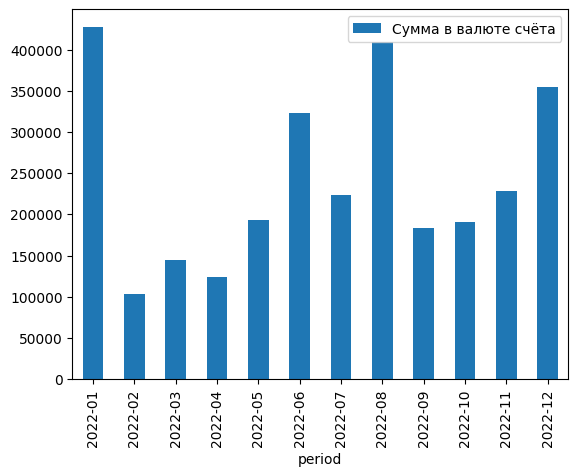

In [211]:
dohod[['period', 'Сумма в валюте счёта']].groupby(by='period').sum().plot.bar()